# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

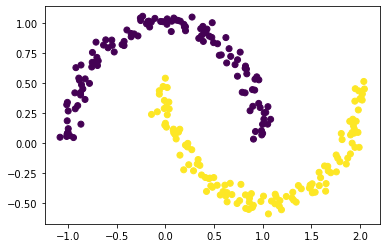

In [3]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

The semantics in the above dataset are not captured by KMeans clustering on a non-globular dataset, and I think it will perform and capture better structural semantics for the globular data.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

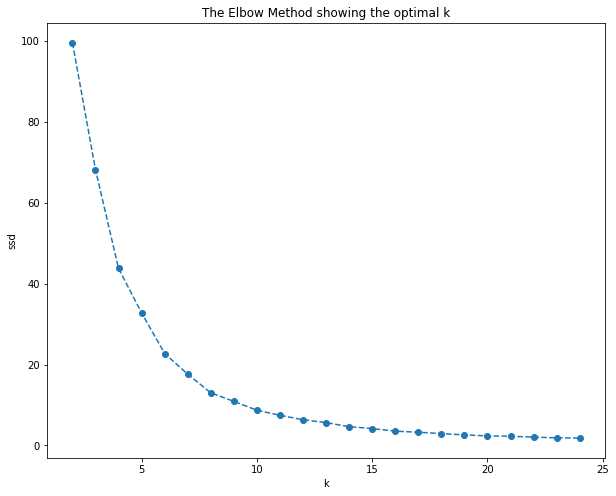

The best K= 8


In [13]:
from kneed import KneeLocator
ssd=[]
for k in range(2,25):
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(2,25),ssd,'o--')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('The Elbow Method showing the optimal k')
plt.show()
k= KneeLocator(range(2, 25),ssd, curve="convex", direction="decreasing")
print("The best K= {}".format(k.elbow))

Text(0.5, 1.0, 'K_Means (2 clusters)')

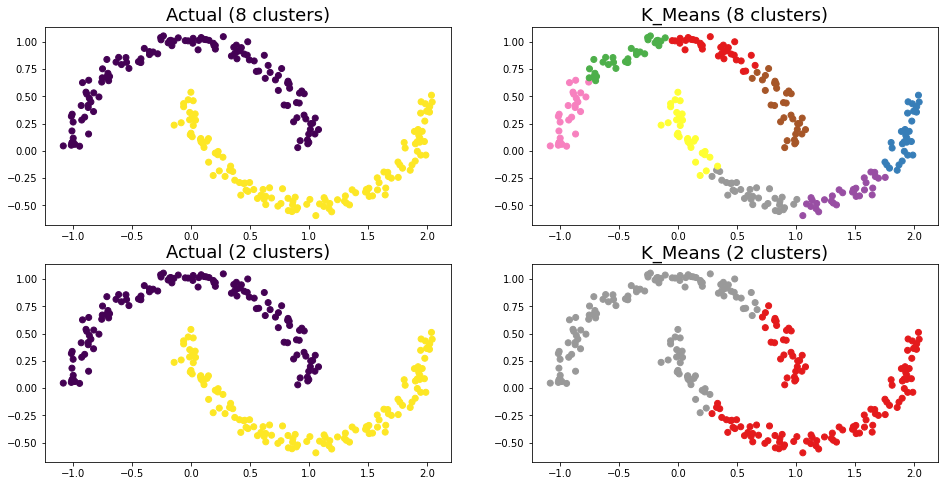

In [22]:
model = KMeans(n_clusters=8)
k_means=model.fit_predict(X)


fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes[0,0].scatter(X[:,0], X[:,1], c=y)
axes[0,1].scatter(X[:,0], X[:,1], c=k_means, cmap=plt.cm.Set1)
axes[0,0].set_title('Actual (8 clusters)', fontsize=18)
axes[0,1].set_title('K_Means (8 clusters)', fontsize=18)

model2 = KMeans(n_clusters=2)
k_means2=model2.fit_predict(X)
axes[1,0].scatter(X[:,0], X[:,1], c=y)
axes[1,1].scatter(X[:,0], X[:,1], c=k_means2, cmap=plt.cm.Set1)
axes[1,0].set_title('Actual (2 clusters)', fontsize=18)
axes[1,1].set_title('K_Means (2 clusters)', fontsize=18)

When K=2 in the part of the moon that are overlapping was misclassified as the classifier was confused
unlike using the best k (8) as it makes 8 non-overlapping clusters.

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

----------------------------------------------------------------


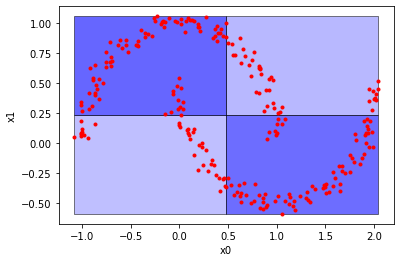

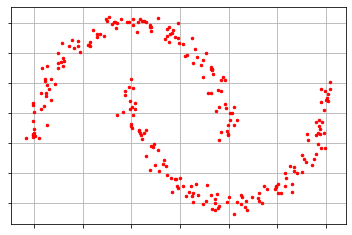

Interval = 2
Amount of clusters: 1
----------------------------------------------------------------
----------------------------------------------------------------


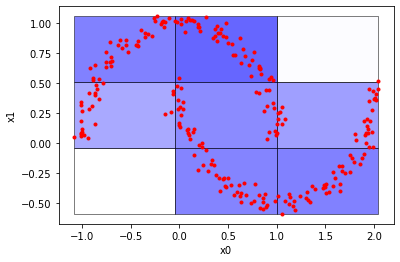

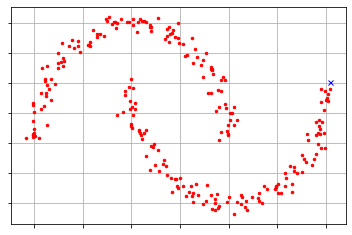

Interval = 3
Amount of clusters: 1
----------------------------------------------------------------
----------------------------------------------------------------


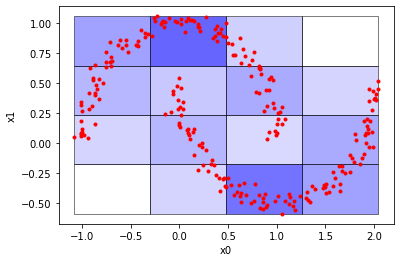

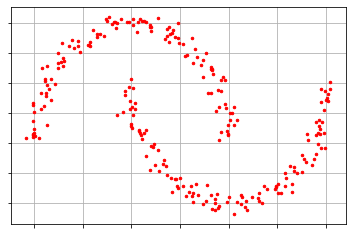

Interval = 4
Amount of clusters: 1
----------------------------------------------------------------
----------------------------------------------------------------


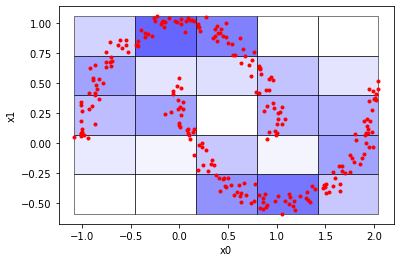

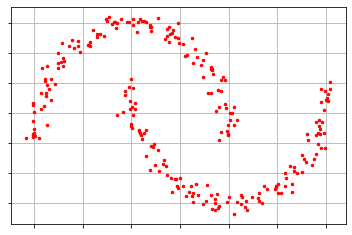

Interval = 5
Amount of clusters: 1
----------------------------------------------------------------
----------------------------------------------------------------


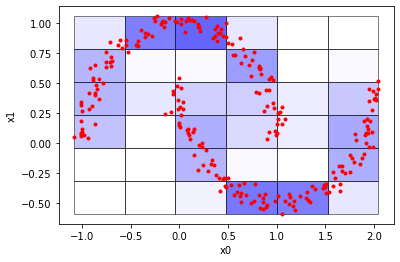

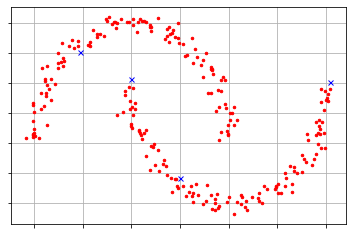

Interval = 6
Amount of clusters: 1
----------------------------------------------------------------
----------------------------------------------------------------


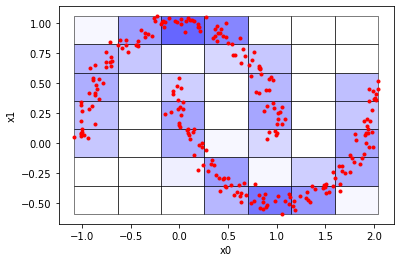

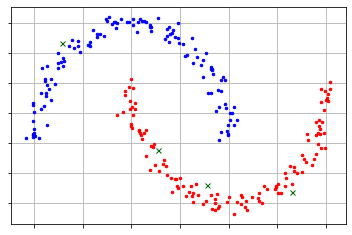

Interval = 7
Amount of clusters: 2
This interval is a good candidate! 
----------------------------------------------------------------
----------------------------------------------------------------


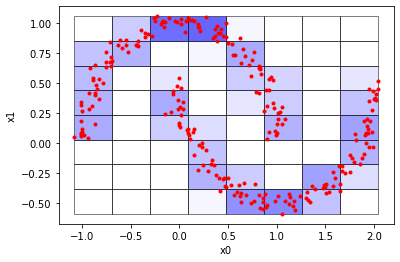

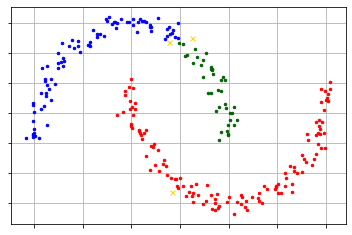

Interval = 8
Amount of clusters: 3
----------------------------------------------------------------
----------------------------------------------------------------


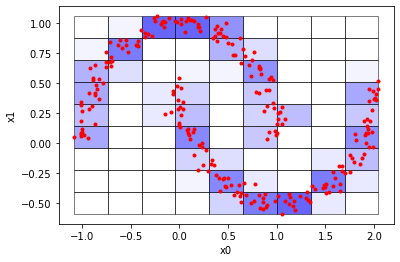

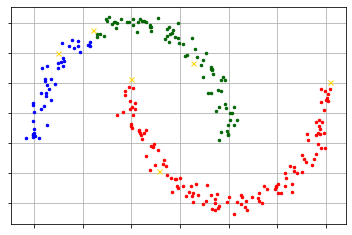

Interval = 9
Amount of clusters: 3
----------------------------------------------------------------
----------------------------------------------------------------


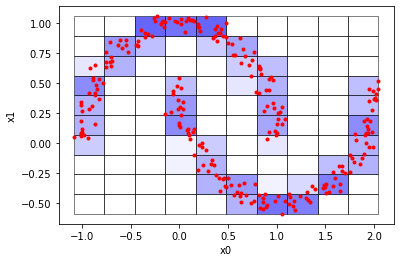

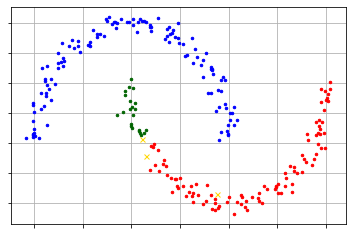

Interval = 10
Amount of clusters: 3
----------------------------------------------------------------


In [27]:
threshold = 1

for i in range (2,11):
    print("----------------------------------------------------------------")
    clique_instance = clique(X, i, threshold)
    clique_instance.process()
    clusters = clique_instance.get_clusters()  
    noise = clique_instance.get_noise() 
    cells = clique_instance.get_cells()
    clique_visualizer.show_grid(cells, X)
    clique_visualizer.show_clusters(X, clusters, noise)
    print("Interval = {}".format(i))
    print("Amount of clusters: {}".format(len(clusters)))
    if len(clusters) == 2:
        print("This interval is a good candidate! ")
    print("----------------------------------------------------------------")

1) The best results was when threshold= 1.<br>
2) The best interval is 7.<br>
3) As clique considers the density and the continuity of the units.<br>

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [28]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

Clusters=2


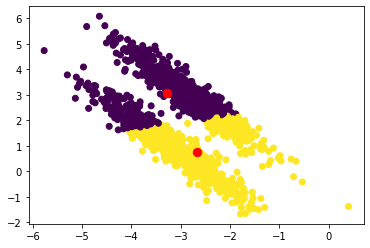

In [30]:
k_means = KMeans(n_clusters=2)
k_means.fit(X_aniso)
y_predict = k_means.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_predict)
cl_centers = k_means.cluster_centers_
print("Clusters={}".format(len(cl_centers)))
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='red', s=70);


Clusters= 4


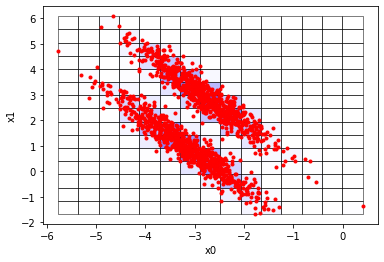

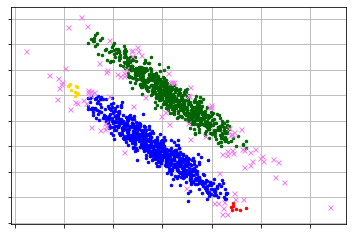

In [32]:
clique_instance = clique(X_aniso,15,6)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise() 
cells = clique_instance.get_cells()
print("Clusters= {}".format(len(clusters)))

clique_visualizer.show_grid(cells, X_aniso)
clique_visualizer.show_clusters(X_aniso, clusters, noise)

4) 
   - Number of cluster in clique is 4 as there are some dense grids are slitly far from other points. <br>
   - As the K-means doesn't consider continuity and splits it into a lower and upper part withrespect to tje distance between the point and the centroid.

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [35]:
def PCA(X, n_components = 2):
    X_mean = X - np.mean(X , axis = 0)
    X_std = StandardScaler().fit_transform(X_mean)
    cov_mat = np.cov(X_std , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
 
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    eigenvector_subset = sorted_eigenvectors[:,0:n_components]

    X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

     
    return X_reduced, sorted_eigenvectors, sorted_eigenvalues

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [37]:
def kmeans(x,k, no_of_iterations = 20):
    x_id = np.random.choice(len(x), k, replace=False)
    centroids = x[x_id, :] #choose a centroid
    
    distances = cdist(x, centroids ,'euclidean')
    list_of_cluster_centers = np.array([np.argmin(i) for i in distances]) 
    
    for _ in range(no_of_iterations): 
        centroids = []

        for x_id in range(k):
            temp_cent = x[list_of_cluster_centers==x_id].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)
        
        distances = cdist(x, centroids ,'euclidean')
        list_of_cluster_centers = np.array([np.argmin(i) for i in distances])
        
    return list_of_cluster_centers